## Model Selection using RFE (Housing Case Study)

### Importing and Understanding Data

In [69]:
import numpy as np
import pandas as pd

In [70]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)


In [191]:
bikes = pd.read_csv("day.csv")

In [72]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [73]:
bikes.shape

(730, 16)

In [74]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [75]:
# Converting yr, mnth, holiday, weekday,workingday, weathersit into object data type
#bikes = bikes.astype({'yr': 'object', 'season': 'object', 'mnth': 'object', 'holiday': 'object', 'weekday': 'object', 'workingday': 'object', 'weathersit': 'object'})


In [192]:
# Droping weekday column as it has almost same mean for all days. 

bikes.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [77]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [78]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

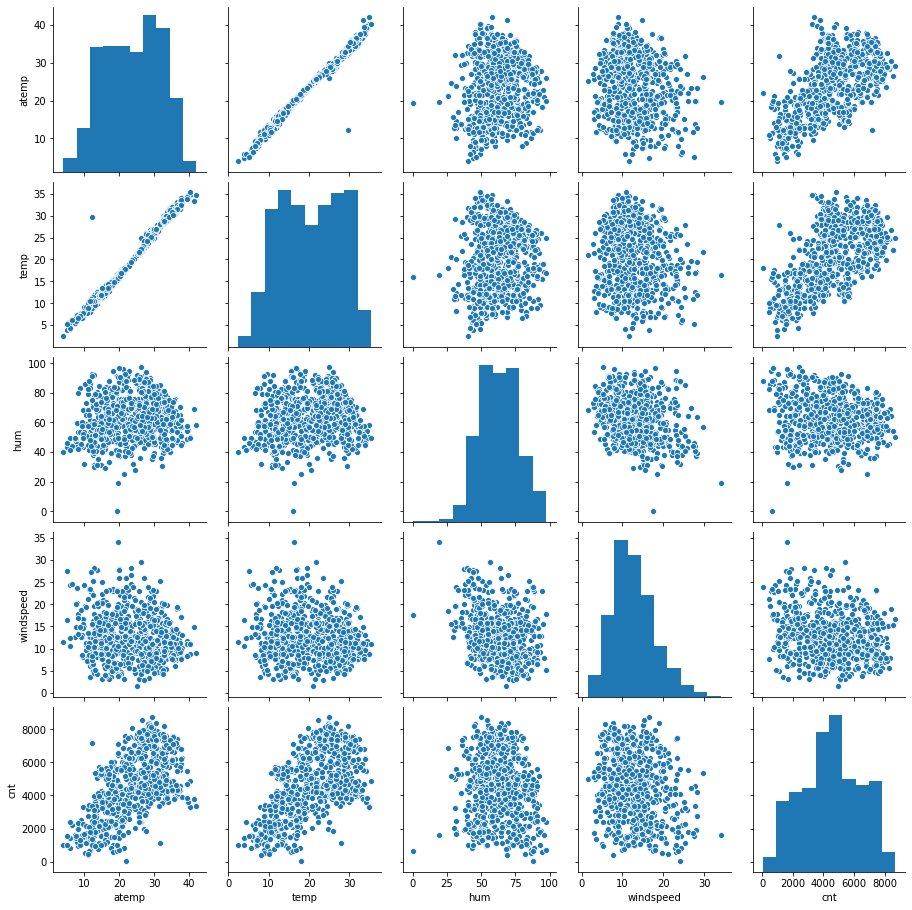

In [80]:
#plt.figure(figsize=(100, 100))
bikes1=bikes[['atemp','temp','hum','windspeed','cnt']]
sns.pairplot(bikes1)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

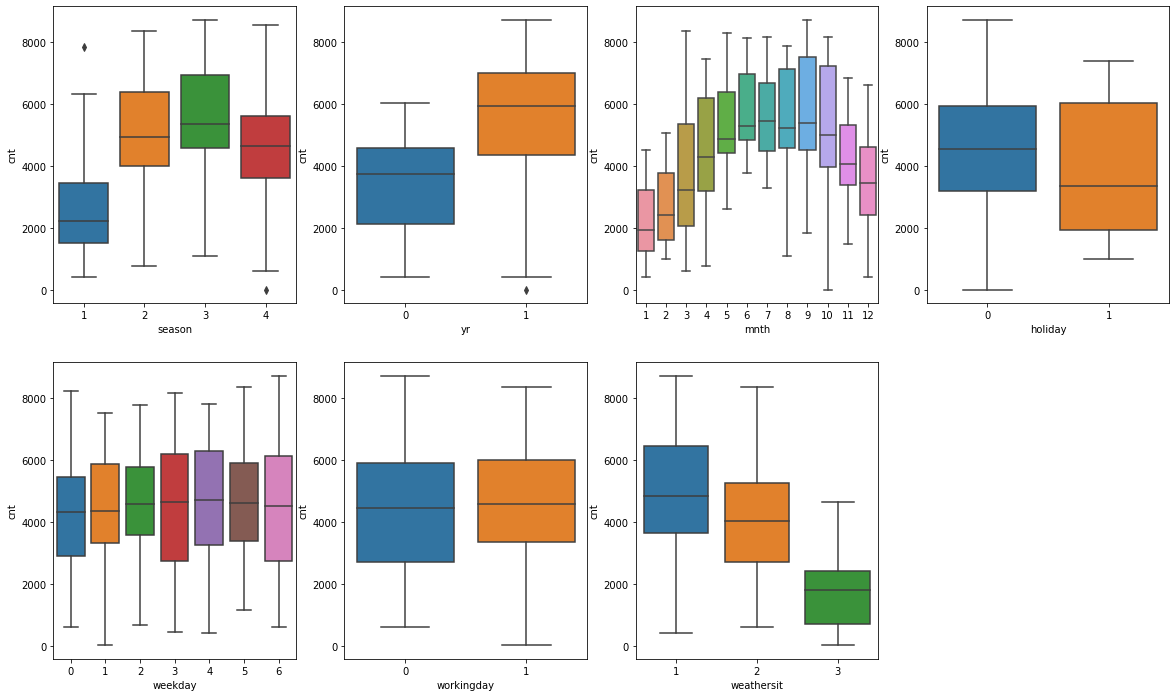

In [81]:
plt.figure(figsize=(20, 12))
#season (1:spring, 2:summer, 3:fall, 4:winter)
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
#yr : year (0: 2018, 1:2019)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
#mnth : month ( 1 to 12)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
#weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)

plt.show()

## Step 3: Data Preparation

### Dummy Variables

In [193]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status1 = pd.get_dummies(bikes['season'])

In [194]:
# Check what the dataset 'status' looks like
status1.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [195]:
status1.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [196]:
status2 = pd.get_dummies(bikes['weathersit'])

In [197]:
status2.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `spring` column, as the type of season can be identified with just the last three columns

In [198]:
status3 = pd.get_dummies(bikes['mnth'])

In [199]:
status3.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [200]:
status4 = pd.get_dummies(bikes['weekday'])

In [201]:
status4.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [202]:
# Let's drop the first column from status df using 'drop_first = True'

status1 = pd.get_dummies(bikes['season'], drop_first = True)
status2 = pd.get_dummies(bikes['weathersit'])
status3 = pd.get_dummies(bikes['mnth'], drop_first = True)
status4 = pd.get_dummies(bikes['weekday'], drop_first = True)

In [203]:
# Add the results to the original housing dataframe

bikes = pd.concat([bikes, status1], axis = 1)

In [204]:
#Rename the columns
bikes.rename(columns = {2:'summer', 3:'fall', 4:'winter'}, inplace = True)

In [205]:
bikes = pd.concat([bikes, status2], axis = 1)

In [206]:
bikes.rename(columns = {1:'Mist', 2:'Snow', 3:'Rain'}, inplace = True)

In [207]:
bikes = pd.concat([bikes, status3], axis = 1)

In [208]:
bikes.rename(columns = {2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace = True)


In [209]:
bikes = pd.concat([bikes, status4], axis = 1)

In [210]:
bikes.rename(columns = {1:'Mon', 2:'Tue', 3:'Wed',4:'Thr',5:'Fri',6:'Sat'}, inplace = True)

In [211]:
# Now let's see the head of our dataframe.

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,Snow,Rain,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Mon,Tue,Wed,Thr,Fri,Sat
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [212]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    uint8  
 13  fall        730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Mist        730 non-null    uint8  
 16  Snow        730 non-null    uint8  
 17  Rain        730 non-null    uint8  
 18  Feb         730 non-null    uint8  
 19  Mar         730 non-null    u

In [213]:
#Change the datatype
#bikes = bikes.astype({'summer': 'object', 'fall': 'object', 'winter': 'object', 'Mist': 'object', 'Snow': 'object', 'Rain': 'object', 'Feb': 'object', 'Mar': 'object', 'Apr': 'object', 'May': 'object', 'Jun': 'object', 'Jul': 'object', 'Aug': 'object', 'Sept': 'object', 'Oct': 'object', 'Nov': 'object', 'Dec': 'object', 'Mon': 'object', 'Tue': 'object', 'Wed': 'object', 'Thr': 'object', 'Fri': 'object', 'Sat': 'object'})                       



In [214]:
# Droping season and weather as we have created the dummies for it

bikes.drop(['season', 'weathersit','mnth','weekday'], axis = 1, inplace = True)

In [215]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,Snow,Rain,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Mon,Tue,Wed,Thr,Fri,Sat
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [216]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   summer      730 non-null    uint8  
 9   fall        730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Mist        730 non-null    uint8  
 12  Snow        730 non-null    uint8  
 13  Rain        730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Mar         730 non-null    uint8  
 16  Apr         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Jul         730 non-null    u

### Finding Corrilation

In [217]:
bikes.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,Snow,Rain,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Mon,Tue,Wed,Thr,Fri,Sat
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-5.254075e-18,3.478017e-19,1.700090e-17,0.031286,-0.005796,-0.073758,1.428651e-19,-1.363849e-19,-4.983560e-18,-1.363849e-19,-4.983560e-18,-1.363849e-19,8.592246e-18,-9.413392e-18,8.592246e-18,-7.198476e-18,1.091079e-17,0.003904,6.526760e-19,-0.003935,2.175587e-19,2.175587e-19,-0.003904
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-2.440810e-02,-2.639258e-02,1.678505e-02,0.028600,-0.018668,-0.029619,1.198013e-02,-5.243172e-02,8.174933e-03,6.362682e-03,-5.150208e-02,6.362682e-03,-5.243172e-02,8.174933e-03,6.362682e-03,6.785194e-02,6.362682e-03,0.279764,-4.670117e-02,-0.046213,-2.325423e-02,-2.325423e-02,-0.070541
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,1.509123e-02,1.677487e-02,-4.623058e-03,-0.058029,0.048877,0.028990,-3.092787e-03,2.767245e-02,-1.087082e-02,6.541813e-03,2.130094e-02,-1.458882e-02,3.823776e-02,-1.087082e-02,-4.023504e-03,-1.087082e-02,-1.458882e-02,0.152976,2.688958e-01,0.267305,2.604690e-01,2.604690e-01,-0.602419
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,1.548756e-01,6.782830e-01,-2.255900e-01,0.114794,-0.096297,-0.058461,-3.106261e-01,-1.749229e-01,-4.185889e-02,1.651884e-01,3.083139e-01,4.327222e-01,3.546479e-01,1.977294e-01,-1.761584e-02,-2.066901e-01,-2.856645e-01,-0.004799,1.935952e-02,0.023459,1.949216e-02,-5.003258e-06,-0.030363
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,1.631513e-01,6.557572e-01,-2.056343e-01,0.113740,-0.092933,-0.064937,-3.108452e-01,-1.731348e-01,-3.204912e-02,1.704469e-01,3.007681e-01,4.293501e-01,3.309389e-01,1.924774e-01,-4.775183e-03,-1.968773e-01,-2.774839e-01,0.000091,2.204543e-02,0.020842,2.045265e-02,-8.544145e-03,-0.031340
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-2.870035e-03,2.413415e-02,1.639076e-01,-0.574367,0.490628,0.267592,-1.305206e-01,-8.388743e-02,-8.326643e-02,1.312731e-01,-1.090477e-01,-6.375685e-02,2.158033e-02,1.831181e-01,1.415566e-01,-5.837193e-03,8.220022e-02,0.028591,4.061570e-02,0.046059,-5.200348e-02,-3.980893e-02,-0.023310
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,9.742067e-02,-1.398857e-01,-1.356120e-01,-0.004234,-0.037177,0.117332,9.609291e-02,1.265752e-01,1.698301e-01,-2.953449e-02,-1.962363e-02,-9.608996e-02,-6.912465e-02,-9.482530e-02,-6.013274e-02,-2.587339e-02,-5.461552e-02,0.000999,6.961095e-03,-0.014025,5.792278e-03,-2.163260e-02,0.032187
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,1.453245e-01,3.459080e-01,6.461909e-02,0.251010,-0.170686,-0.240602,-2.738478e-01,-1.284558e-01,-3.574116e-03,1.325529e-01,1.955684e-01,1.662362e-01,1.821001e-01,1.946635e-01,1.088461e-01,-4.034360e-02,-1.738782e-01,-0.035991,5.596898e-04,0.014012,3.355106e-02,3.840273e-02,0.009012
summer,-5.254075e-18,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,1.000000e+00,-3.418943e-01,-3.296500e-01,-0.024246,0.040011,-0.043283,-1.673311e-01,7.211912e-02,5.154964e-01,5.248014e-01,2.857575e-01,-1.768562e-01,-1.768562e-01,-1.737204e-01,-1.768562e-01,-1.737204e-01,-1.768562e-01,0.004803,-1.928926e-03,0.009410,-1.928926e-03,-1.928926e-03,-0.004187
fall,3.478017e-19,-0.026393,0.016775,0.678283,0.655757,0.024134,-0.139886,0.345908,-3.418943e-01,1.000000e+00,-3.344412e-01,0.109022,-0.101756,-0.026393,-1.697631e-01,-1.794266e-01,-1.762453e-01,-1.794266e-01,5.187361e-02,5.172832e-01,5.172832e-01,3.256163e-01,-1.794266e-01,-1.762453e-01,-1.794266e-01,-0.009294,1.939879e-03,0.004265,1.090261e-02,1.939879e-03,-0.000367


In [218]:
# As we can see that temp and atemp are highly corrilated lets drop the temp column
bikes.drop(['temp'], axis = 1, inplace = True)

## Splitting the Data into Training and Testing Sets

In [219]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [220]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [221]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,Snow,Rain,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Mon,Tue,Wed,Thr,Fri,Sat
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [222]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [223]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [224]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [225]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 3),
 ('winter', True, 1),
 ('Mist', False, 2),
 ('Snow', False, 7),
 ('Rain', True, 1),
 ('Feb', False, 13),
 ('Mar', False, 9),
 ('Apr', False, 11),
 ('May', False, 8),
 ('Jun', False, 10),
 ('Jul', False, 12),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', False, 4),
 ('Nov', False, 15),
 ('Dec', False, 16),
 ('Mon', False, 14),
 ('Tue', False, 17),
 ('Wed', False, 19),
 ('Thr', False, 20),
 ('Fri', False, 18),
 ('Sat', False, 5)]

In [226]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'Rain', 'Aug', 'Sept'],
      dtype='object')

In [227]:
X_train.columns[~rfe.support_]

Index(['workingday', 'fall', 'Mist', 'Snow', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat'],
      dtype='object')

In [228]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [229]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [230]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [231]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.98e-183
Time:                        23:21:21   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2747      0.027     10.328      0.0

In [232]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'Rain', 'Aug', 'Sept'],
      dtype='object')

In [233]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [234]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [235]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [236]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.98e-183
Time:                        23:21:23   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2747      0.027     10.328      0.0

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.26
2,atemp,8.55
4,windspeed,3.55
0,yr,2.01
5,summer,1.82
6,winter,1.73
8,Aug,1.54
9,Sept,1.30
7,Rain,1.09
1,holiday,1.04


In [238]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [239]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.98e-183
Time:                        23:21:26   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2747      0.027     10.328      0.0

In [240]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.89
3,windspeed,2.95
0,yr,2.00
4,summer,1.80
7,Aug,1.54
5,winter,1.47
8,Sept,1.29
6,Rain,1.06
1,holiday,1.04


In [241]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [242]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [243]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          4.65e-168
Time:                        23:21:29   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0858      0.018      4.788      0.0

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [244]:
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter', 'Rain',
       'Aug', 'Sept'],
      dtype='object')

In [245]:
y_train_price = lm.predict(X_train_lm)

In [246]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

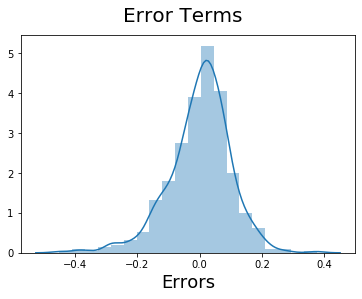

In [247]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [248]:
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [249]:
y_test = df_test.pop('cnt')
X_test = df_test

In [250]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [251]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

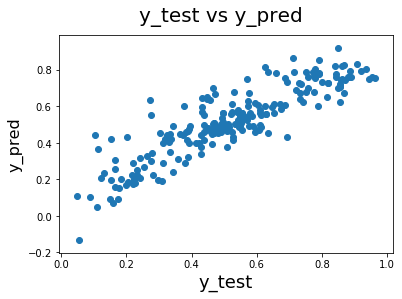

In [252]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [253]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7748525737132625